<a href="https://colab.research.google.com/github/abrown12005/CMP_SC-4540-HW/blob/main/Homework2Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook describes how we use gradient decent to find the optimal slope and intercept for question 2.3.

Click "Run all" at the top for a complete run through of the code

First we need to create the data set that the linear regression will be fit to

In [ ]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
lineardata = np.array([[1,1.5],[4,3.5],[7,9],[10,8]])

Next we assign hyper-parameters and other constants, as well as symbols

In [ ]:
inp = sp.Symbol('intp')
slp = sp.Symbol('slp')
d = lineardata
t = 'False'
min_stpsz = 0.0001
max_stpcn = 2000
learning_rate = 0.01
step_count = 0
SoSR = 0
n_inp = 0
n_slp = 1

Now we set up the cost function (in this case the Sum of Squared Residuals) and take the gradient for each variable

In [ ]:
for i in range(len(d)):
  SoSR += (d[i,1] - (inp + slp*d[i,0]))**2
SoSR *= 1/(2*len(d))

#Takes derivative
diSoSR = sp.diff(SoSR,inp)
dsSoSR = sp.diff(SoSR,slp)

Finally we run the loop to solve for when the values converge

In [ ]:
#Primary loop to solve for the converging values
while t != 'True':
  g_inp = diSoSR.subs({inp:n_inp,slp:n_slp})
  g_slp = dsSoSR.subs({inp:n_inp,slp:n_slp})

  i_stpsz = g_inp * learning_rate
  s_stpsz = g_slp * learning_rate

  if abs(i_stpsz) <= min_stpsz and abs(s_stpsz) <= min_stpsz or step_count == max_stpcn:
    t = 'True'
    break
  else:
    n_inp = n_inp - i_stpsz
    n_slp = n_slp - s_stpsz
    step_count += 1

Now graph the final line with the data points and print the intercept and slope

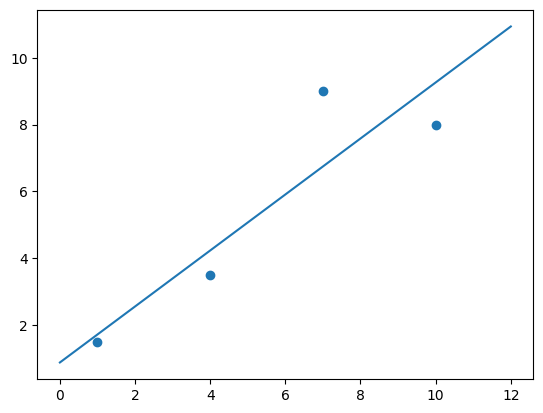

Step count: 1201; Intercept: 0.879193180715491; Slope: 0.838331782412018


In [ ]:
plt.scatter(d[:,0],d[:,1])
x = np.linspace(0,12,100)
y = n_inp + n_slp*x
plt.plot(x,y)
plt.show()

print(f"Step count: {step_count}; Intercept: {n_inp}; Slope: {n_slp}")